# Exploring Unsupervised Machine Learning

Q)In this K-means Clustering algorithm task is to find the number of optimum clusters based on their similarity.In this iris dataset we are supposed to predict the number of optimal clusters formed and visualize it.Consider The iris dataset generally here should be unlabelled because here we are exploring unsupervised algorithm.

In [65]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<h3> About the dataset (iris) </h3>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by  Ronald Fisher in his 1936 paper The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

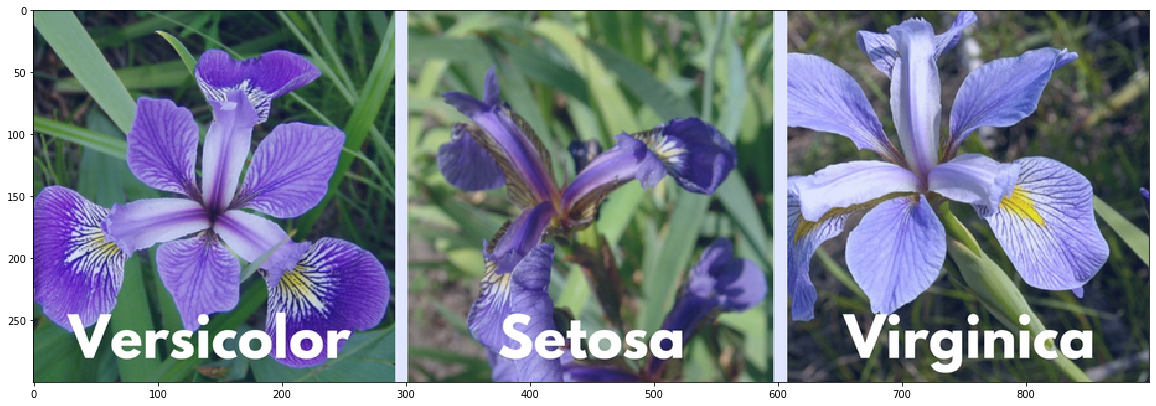

In [66]:
#Plotting the image of three Iris flower species
img = mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.imshow(img)

<h5><center> Species of Iris Flowers </center></h5>

<h3>Loading Dataset</h3>

In [67]:
#import iris dataset from seaborn library
iris = sns.load_dataset('iris')
iris.head() #Print first 5 records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
iris.tail() #Print last 5 records

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Representation of the statistical data

In [69]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We are now checking for the data type of each column and also trying to find out how much null values are present

In [70]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


As per the above information there are no null values present in this dataset.

<h3> Data Visualizations </h3> 

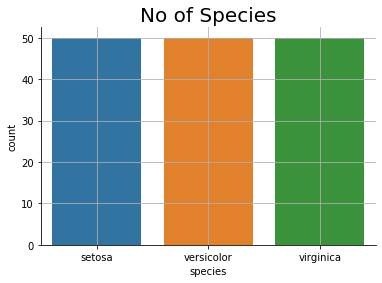

In [71]:
sns.countplot(x='species',data=iris)
plt.title('No of Species',fontsize=20)
plt.grid()
sns.despine(top = True, right = True)

As per the above visualizations it is clear that it contains 50 species of each means total there are 150 records.

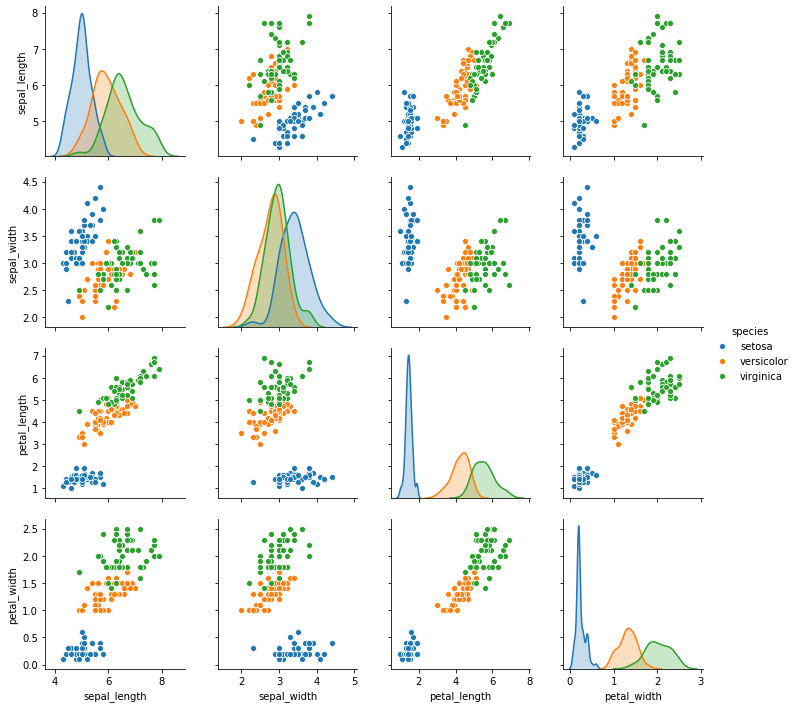

In [72]:
sns.pairplot(data = iris, hue = 'species')

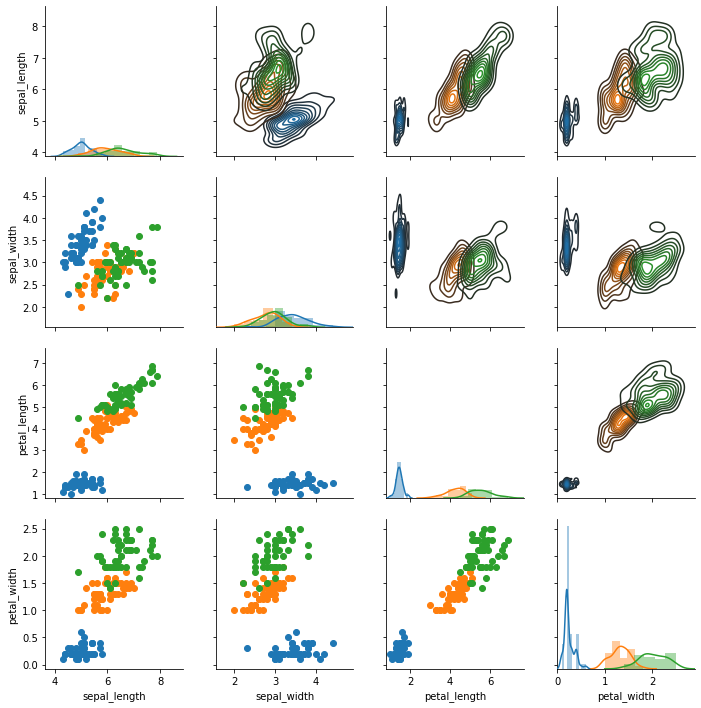

In [73]:
iris_grid = sns.PairGrid(iris, hue = 'species')

iris_grid.map_diag(sns.distplot)
iris_grid.map_lower(plt.scatter)
iris_grid.map_upper(sns.kdeplot)

<h3> Finding Optimum numbers of clusters by K-means </h3>

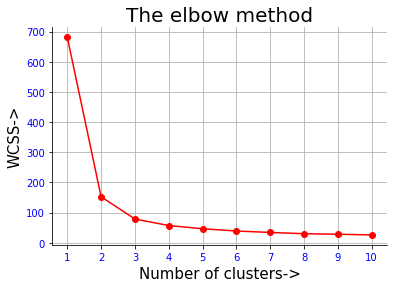

In [74]:
x = iris.iloc[:,0:4].values #Taking only input features
from sklearn.cluster import KMeans #importing K-means clustering from Scikit-learn
wcss = [] #Within clusters sum of squares

#Fitting Model
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
   
 
# allowing us to observe The elbow
plt.plot(range(1, 11), wcss, 'o-', c = 'red')
plt.title('The elbow method', fontsize = 20)
plt.xlabel('Number of clusters->', fontsize = 15)
plt.ylabel('WCSS->', fontsize = 15) 
plt.grid()
plt.xticks(np.arange(1,11), c = 'blue')
plt.yticks(c = 'blue')
sns.despine(top = True, right = True)
plt.show()

As per the above visualizations it is clear that at k=3 from there the change is gradual therefore it should be the best value for our  model.Therefore considering the Number of clusters to be 3.

In [75]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans #These are the predicted va

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Visualizing the above cluster results based on sepal length and sepal width.

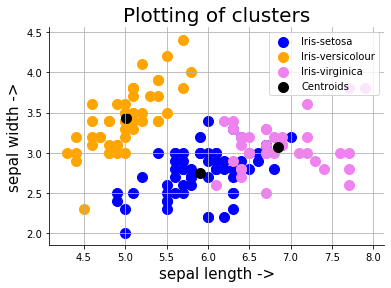

In [76]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'violet', label = 'Iris-virginica')

#Plotting the centroid of the Clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend(loc=1)
plt.grid()
plt.xlabel('sepal length ->', fontsize = 15)
plt.ylabel('sepal width ->', fontsize = 15)
plt.title('Plotting of clusters', fontsize = 20)
sns.despine(top = True, right = True)